Title  : "Final Exam"
<br>
Author : James Wiliam Andreas Seli Kiti ( 20174920011 / Statistika )


# Case 1

Imagine that you work for a company that builds Cars. A Car is a fairly complex product, and there are several factories that assemble them which the company pays a certain amount per unit. The cost of this Car model on the market is fixed at $\$ 1500$, different factories assemble the Cars at different speeds and costs. Factory $f_1$ produces $60$ per day at $\$ 1350$ per unit, factory $f_2$ $50$ per day at $\$ 1260$ per unit and $f_3$ $35$ per day at $\$ 1200$ per unit. We have $1$ month to assemble $2600$ units under the constraint that no factory is to produce more than double the units than any other factory. The question is, what is the optimal production allocation between the factories such that we maximize the profit obtained from selling the Cars under those constraints?

# Solution:

In [2]:
from pulp import *
problem = LpProblem("problemName", LpMaximize)

In [3]:
# factory cost per day
cf1 = 1350
cf2 = 1260
cf3 = 1200           # factory throughput per day
f1 = 60
f2 = 50
f3 = 35           # production goal
goal = 2600        # time limit
max_num_days = 30
num_factories = 3

In [4]:
variable = LpVariable("variableName")
variable

variableName

In [5]:
# factories
num_factories = 3
factory_days = LpVariable.dicts("factoryDays", list(range(num_factories)), 0, 30, cat="Continuous")
factory_days

{0: factoryDays_0, 1: factoryDays_1, 2: factoryDays_2}

In [6]:
c1 = factory_days[0]*f1 + factory_days[1]*f2 + factory_days[2] * f3 >= goal 

# production constraints
c2 = factory_days[0]*f1 <= 2*factory_days[1]*f2
c3 = factory_days[0]*f1 <= 2*factory_days[2]*f3
c4 = factory_days[1]*f2 <= 2*factory_days[2]*f3
c5 = factory_days[1]*f2 <= 2*factory_days[0]*f1
c6 = factory_days[2]*f3 <= 2*factory_days[1]*f2
c7 = factory_days[2]*f3 <= 2*factory_days[0]*f1  

# adding the constraints to the problem
problem += c1
problem += c2
problem += c3
problem += c4
problem += c5
problem += c6
problem += c7

In [7]:
# objective function
problem += -factory_days[0]*cf1*f1 - factory_days[1]*cf2*f2 - factory_days[2]*cf3*f3

In [8]:
print(problem)

problemName:
MAXIMIZE
-81000*factoryDays_0 + -63000*factoryDays_1 + -42000*factoryDays_2 + 0
SUBJECT TO
_C1: 60 factoryDays_0 + 50 factoryDays_1 + 35 factoryDays_2 >= 2600

_C2: 60 factoryDays_0 - 100 factoryDays_1 <= 0

_C3: 60 factoryDays_0 - 70 factoryDays_2 <= 0

_C4: 50 factoryDays_1 - 70 factoryDays_2 <= 0

_C5: - 120 factoryDays_0 + 50 factoryDays_1 <= 0

_C6: - 100 factoryDays_1 + 35 factoryDays_2 <= 0

_C7: - 120 factoryDays_0 + 35 factoryDays_2 <= 0

VARIABLES
factoryDays_0 <= 30 Continuous
factoryDays_1 <= 30 Continuous
factoryDays_2 <= 30 Continuous



In [9]:
# solving
problem.solve()

1

In [10]:
print('Factory 1:',(f"{factory_days[0].varValue}"))
print('Factory 2:',(f"{factory_days[1].varValue}"))
print('Factory 3:',(f"{factory_days[2].varValue}"))

Factory 1: 8.75
Factory 2: 20.5
Factory 3: 30.0


# Case 2

In this Module you will continue to improve your knowledges about Linear Programming Model. Let say you would like to make some sausages and you have the following ingredients available:

|Ingredient|Cost (€/kg)|Availability (kg)|
|:--------:|:---------:|:---------------:|
| Chicken  |   4.32    |       30        |    
|  Wheat   |   2.46    |       20        |
|  Starch  |   1.86    |       17        |
|    etc   |   0.3     |       2         |


Assume that you’ll make 2 types of sausage:

* Economy (>35% Chicken)
* Premium (>65% Chicken)
* One sausage is 50 grams (0.05 kg)

According to government regulations of Indonesia: 

* The most starch you can use in your sausages is 20%. 
* You have a contract with a butcher, and have already purchased 23 kg Chicken, that must go in your sausages.
* You have a demand for 420 economy sausages and 615 premium sausages.

So, please figure out how to optimize the cost effectively to blend your sausages.

# Solution:

In [11]:
import pulp

model = pulp.LpProblem("Cost minimising blending problem", pulp.LpMinimize)

In [12]:
# Membuat list variabel yang digunakan

sausage_types = ['economy', 'premium']
ingredients = ['chicken', 'wheat', 'starch', 'etc']

In [13]:
ing_weight = pulp.LpVariable.dicts("weight kg",
                                     ((i, j) for i in sausage_types for j in ingredients),
                                     lowBound=0,
                                     cat='Continuous')

In [14]:
# Fungsi Objektifnya

model += (
    pulp.lpSum([
        4.32 * ing_weight[(i, 'chicken')]
        + 2.46 * ing_weight[(i, 'wheat')]
        + 1.86 * ing_weight[(i, 'starch')]
         + 0.3 * ing_weight[(i, 'etc')]
        for i in sausage_types])
)

In [15]:
# Batasan
# 420 economy and 615 premium sausages at 0.05 kg
model += pulp.lpSum([ing_weight['economy', j] for j in ingredients]) == 420 * 0.05
model += pulp.lpSum([ing_weight['premium', j] for j in ingredients]) == 615 * 0.05

# Economy has >= 35% chicken, premium >= 65% chicken
model += ing_weight['economy', 'chicken'] >= (
    0.35 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'chicken'] >= (
    0.65 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# Sausages must be <= 20% starch
model += ing_weight['economy', 'starch'] <= (
    0.20 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'starch'] <= (
    0.20 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# You have at most 30 kg of chicken, 20 kg of wheat, 17 kg of starch and 2 kg of etc available
model += pulp.lpSum([ing_weight[i, 'chicken'] for i in sausage_types]) <= 30
model += pulp.lpSum([ing_weight[i, 'wheat'] for i in sausage_types]) <= 20
model += pulp.lpSum([ing_weight[i, 'starch'] for i in sausage_types]) <= 17
model += pulp.lpSum([ing_weight[i, 'etc'] for i in sausage_types]) <= 2

# You have at least 23 kg of chicken to use up
model += pulp.lpSum([ing_weight[i, 'chicken'] for i in sausage_types]) >= 23

In [16]:
# Penyelesaian masalahnya

model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [17]:
# Solusi untuk mencari keuntungan maksimal

for var in ing_weight:
    var_value = ing_weight[var].varValue
    print ("The weight of {0} in {1} sausages is {2} kg".format(var[1], var[0], var_value))

The weight of chicken in economy sausages is 7.35 kg
The weight of wheat in economy sausages is 9.45 kg
The weight of starch in economy sausages is 4.2 kg
The weight of etc in economy sausages is 0.0 kg
The weight of chicken in premium sausages is 19.9875 kg
The weight of wheat in premium sausages is 2.6125 kg
The weight of starch in premium sausages is 6.15 kg
The weight of etc in premium sausages is 2.0 kg


In [18]:
total_cost = pulp.value(model.objective)       # Keuntungan optimal yang kita dapat

print("The total cost is €{} for 420 economy sausages and 615 premium sausages".format(round(total_cost, 2)))

The total cost is €167.62 for 420 economy sausages and 615 premium sausages


# Case 3 

Please apply Lenear Regression and Logistic Regression as optimization to the [Iris dataset](iris.csv). 

# Solution:

In [19]:
# Mengimport packages

import numpy as np                                  
import matplotlib.pyplot as plt                 
import pandas as pd  
import seaborn as sns

In [20]:
iris = pd.read_csv('Iris.csv')                        # Mengimport dataset Iris
iris.head()                                           # Menampilkan top 5 data Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris.corr(method='pearson')                          # Melihat korelasi antara variabel dalam dataset Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [22]:
z = iris['Species']                                  # Memisahkan kolom Species
c = iris['PetalWidthCm']                             # Memisahkan kolom PetalWidthCm

In [23]:
x = iris.iloc[:,1:3]                                # Menentukan variabel selain PetalWidthCm sebagai variabel X (independen)
x = x.join(c)
x = x.join(z)
y = iris.iloc[:, 3]                                 # Menentukan PetalWidthCm sebagai variabel Y (dependen)

In [24]:
# Membuat dummy untuk variabel species

species = pd.get_dummies(x['Species'],drop_first=True)

In [25]:
# Menghilangkan kolom species
x = x.drop('Species',axis=1)

# Menggabungkan variabel dummy dengan x
x = pd.concat([x,species],axis=1)

In [26]:
# Membagi dataset menjadi data training dan data test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [27]:
# Memasukkan multipel linier regresi ke data training

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train);

In [28]:
# Memprediksi data test menggunakan data training

y_pred = regressor.predict(x_test)
y_pred

array([5.3259651 , 4.18268757, 1.57850549, 5.83875851, 1.42437572,
       5.60271566, 1.47030102, 4.76614761, 4.82007422, 4.32444598,
       4.89783363, 4.56246128, 4.25934681, 4.70066093, 4.37037128,
       1.35529402, 4.37396629, 3.92866965, 1.44316208, 1.7047213 ,
       4.94256012, 4.10877581, 1.30136742, 1.15122018, 5.1813867 ,
       1.14001136, 1.53938271, 4.36677626, 3.54847217, 1.55457406])

In [29]:
from sklearn.metrics import r2_score             # Melihat berapa persen keakuratan prediksi kita
score=r2_score(y_test,y_pred)

In [30]:
print('Keakuratan prediksi yang kita buat sebesar:',score)

Keakuratan prediksi yang kita buat sebesar: 0.9661202334752407


In [31]:
# Mengubah data string menjadi data numerik

iris = iris.replace({'Iris-setosa' : 1})
iris = iris.replace({'Iris-versicolor' : 2})
iris = iris.replace({'Iris-virginica' : 3})

In [32]:
dummy_ranks = pd.get_dummies(iris['Species'], prefix='d')          # Membuat dummy untuk variabel species
iris = iris.join(dummy_ranks)                                      # menggabungkan data Iris dengan dummy
print(iris.head())                                                 # Melihat hasilnya

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species  d_1  \
0   1            5.1           3.5            1.4           0.2        1    1   
1   2            4.9           3.0            1.4           0.2        1    1   
2   3            4.7           3.2            1.3           0.2        1    1   
3   4            4.6           3.1            1.5           0.2        1    1   
4   5            5.0           3.6            1.4           0.2        1    1   

   d_2  d_3  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0  


In [33]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices('PetalLengthCm ~ SepalLengthCm + SepalWidthCm + PetalWidthCm + d_1 + d_2 + d_3', data = iris, return_type='dataframe')
res = sm.OLS(y, X).fit()

print(res.summary())                                                   # Melihat estimasi koefisiennya

                            OLS Regression Results                            
Dep. Variable:          PetalLengthCm   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1313.
Date:                Tue, 07 Jan 2020   Prob (F-statistic):          3.42e-118
Time:                        11:04:36   Log-Likelihood:                -9.3888
No. Observations:                 150   AIC:                             30.78
Df Residuals:                     144   BIC:                             48.84
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0322      0.194      0.166

# Case 4
from week 9 - 15

## Portofolio Optimization

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp

In [35]:
mp = pd.read_csv("monthly_prices.csv",index_col=0)
mr = pd.DataFrame()

In [36]:
mp.head()

,MSFT,V,WMT
1,44.259998,69.660004,64.839996
2,52.639999,77.580002,57.240002
3,54.349998,79.010002,58.840000
4,55.480000,77.550003,61.299999
5,55.090000,74.489998,66.360001


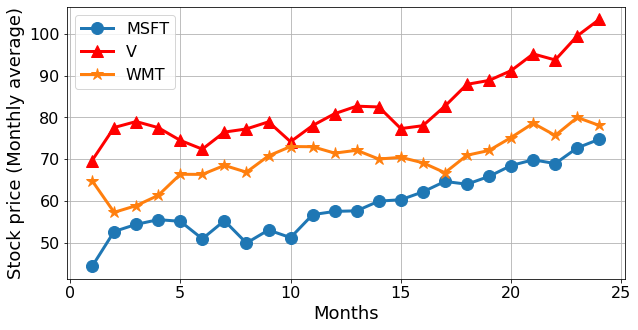

In [37]:
# Plot the data

plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,25)],mp['MSFT'],lw=3,marker='o',markersize=12)
plt.plot([i for i in range(1,25)],mp['V'],lw=3,c='red',marker='^',markersize=12)
plt.plot([i for i in range(1,25)],mp['WMT'],lw=3,marker='*',markersize=12)
plt.legend(mp.columns,fontsize=16)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Stock price (Monthly average)",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

In [38]:
# compute monthly returns
for s in mp.columns:
    date = mp.index[0]
    pr0 = mp[s][date] 
    for t in range(1,len(mp.index)):
        date = mp.index[t]
        pr1 = mp[s][date]
        ret = (pr1-pr0)/pr0
        mr.set_value(date,s,ret)
        pr0 = pr1

C:\Users\MSI GL62-7RDX\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [39]:
mr.head()

,MSFT,V,WMT
2,0.189336,0.113695,-0.117212
3,0.032485,0.018433,0.027952
4,0.020791,-0.018479,0.041808
5,-0.007030,-0.039458,0.082545
6,-0.076420,-0.028192,-0.000301


In [40]:
# get symbol names
symbols = mr.columns

In [41]:
symbols

Index(['MSFT', 'V', 'WMT'], dtype='object')

In [42]:
# Convert monthly return data frame to a numpy matrix
return_data = mr.as_matrix().T

C:\Users\MSI GL62-7RDX\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [43]:
return_data

array([[ 0.18933577,  0.03248478,  0.02079121, -0.00702956, -0.07642038,
         0.08549526, -0.09704872,  0.06276321, -0.03452834,  0.10768032,
         0.01376145,  0.00243646,  0.04027778,  0.00567423,  0.03119816,
         0.04039271, -0.01036353,  0.0293842 ,  0.03947765,  0.02015771,
        -0.01302973,  0.05469312,  0.02847318],
       [ 0.11369506,  0.01843259, -0.01847866, -0.03945848, -0.02819169,
         0.05649957,  0.00993717,  0.02200937, -0.06042569,  0.05231232,
         0.03651504,  0.02224963, -0.0022974 , -0.06290149,  0.00905325,
         0.06011282,  0.06323302,  0.0105754 ,  0.0264431 ,  0.04395968,
        -0.01522634,  0.0616336 ,  0.039775  ],
       [-0.11721151,  0.02795244,  0.04180828,  0.0825449 , -0.00030146,
         0.03240884, -0.02365302,  0.0584716 ,  0.03164733, -0.00068469,
        -0.02096751,  0.00951849, -0.02911822,  0.00585551, -0.01859999,
        -0.03443294,  0.06278097,  0.0162132 ,  0.04300774,  0.0454908 ,
        -0.0371501 ,  0.0569

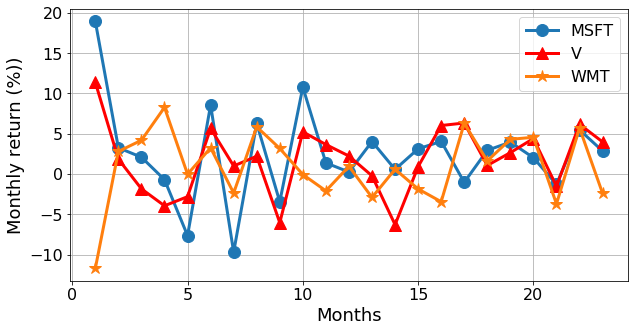

In [44]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,24)],100*mr['MSFT'],lw=3,marker='o',markersize=12)
plt.plot([i for i in range(1,24)],100*mr['V'],lw=3,c='red',marker='^',markersize=12)
plt.plot([i for i in range(1,24)],100*mr['WMT'],lw=3,marker='*',markersize=12)
plt.legend(mp.columns,fontsize=16)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Monthly return (%))",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

In [45]:
r = np.asarray(np.mean(return_data, axis=1))      # mean return

In [46]:
r

array([0.02461117, 0.01823726, 0.00906643])

In [47]:
C = np.asmatrix(np.cov(return_data))            # covariance matrix

In [48]:
C

matrix([[ 0.00336865,  0.0016328 , -0.00075249],
        [ 0.0016328 ,  0.00183242, -0.00056339],
        [-0.00075249, -0.00056339,  0.00197676]])

In [49]:
for j in range(len(symbols)):
    print ('%s: Exp ret = %f, Risk = %f' %(symbols[j],r[j], C[j,j]**0.5))              #expected return and risk

MSFT: Exp ret = 0.024611, Risk = 0.058040
V: Exp ret = 0.018237, Risk = 0.042807
WMT: Exp ret = 0.009066, Risk = 0.044461


In [50]:
### set up the optimation model

# Number of variables
n = len(symbols)

# The variables vector
x = cp.Variable(n)

# The minimum return
req_return = 0.02

# The return
ret = r.T*x

# The risk in xT.Q.x format
risk = cp.quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
prob = cp.Problem(cp.Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])

In [51]:
### Try solving the problem (within a `try/except` loop)

try:
    prob.solve()
    print ("Optimal portfolio")
    print ("----------------------")
    for s in range(len(symbols)):
       print (" Investment in {} : {}% of the portfolio".format(symbols[s],round(100*x.value[s],2)))
    print ("----------------------")
    print ("Exp ret = {}%".format(round(100*ret.value,2)))
    print ("Expected risk    = {}%".format(round(100*risk.value**0.5,2)))
except:
    print ("Error")

Optimal portfolio
----------------------
 Investment in MSFT : 58.28% of the portfolio
 Investment in V : 20.43% of the portfolio
 Investment in WMT : 21.29% of the portfolio
----------------------
Exp ret = 2.0%
Expected risk    = 3.83%


In [52]:
prob.status

'optimal'

In [53]:
x.value

array([0.58281755, 0.20432414, 0.21285832])

## Best Seller

**Problem Formulation:**
You want to read the maximum number of books per year. However, at most you can only read for 5 hours per week. What should your reading list look like if you want to cover most of New York Times Best Seller List 

**Assuming that average speed of reading The average reader snails through prose at a rate of about 250-300 words per minute, which roughly equates to about one page per minute, we assume 60 pages/ hour is the regular speed.

----------
> - Objective: Maximizr Number of Books Read
> - LP Form: Maximization
> - Decision Variables: Binary Variables whether we should read the book or not.
> - Constrains: Limited Number of Time available to read per week

In [54]:
from pulp import *
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [55]:
# getting data from :
# https://www.goodreads.com/list/show/83612.NY_Times_Fiction_Best_Sellers_2015

In [56]:
data = pd.read_csv('goodreads_bestsellers.csv', sep=',', encoding='latin-1')
data[:5]

,_position,book_name,goodreads_score,author,rating,url,my_column/_source,rating.1,total_ratings,pages
0,1,All the Light We Cannot See,3288,Anthony Doerr,"4.29 of 5 stars 4.29 avg rating  179,342 ratings",https://www.goodreads.com/book/show/18143977-a...,/book/show/18143977-all-the-light-we-cannot-see,4.29,179342,530
1,2,The Fault in Our Stars,2471,John Green,"4.36 of 5 stars 4.36 avg rating  1,577,550 ra...",https://www.goodreads.com/book/show/11870085-t...,/book/show/11870085-the-fault-in-our-stars,4.36,1577550,313
2,3,The Nightingale,2196,Kristin Hannah,"4.54 of 5 stars 4.54 avg rating  52,099 ratings",https://www.goodreads.com/book/show/21853621-t...,/book/show/21853621-the-nightingale,4.54,52099,438
3,4,The Girl on the Train,2188,Paula Hawkins,"3.86 of 5 stars 3.86 avg rating  282,985 ratings",https://www.goodreads.com/book/show/22557272-t...,/book/show/22557272-the-girl-on-the-train,3.86,282985,323
4,5,Gone Girl,1756,Gillian Flynn,"3.98 of 5 stars 3.98 avg rating  1,083,869 ra...",https://www.goodreads.com/book/show/19288043-g...,/book/show/19288043-gone-girl,3.98,1083869,422


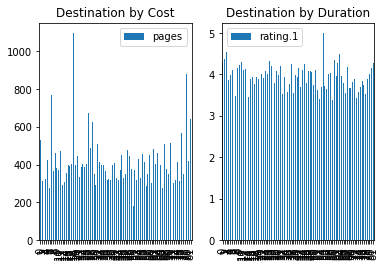

In [57]:
fig, axs = plt.subplots(1,2)
my_plot = data[['book_name', 'pages']].plot(kind='bar', title="Destination by Cost", ax=axs[0])
my_plot = data[['book_name', 'rating.1']].plot(kind='bar', title="Destination by Duration", ax=axs[1])
# my_plot.set_xlabel("destination")

In [58]:
# create the LP object, set up as a maximization problem --> since we want to maximize the number of books we read in a year
prob = pulp.LpProblem('BuyingBestsellers', pulp.LpMaximize)

In [59]:
#create decision - yes or no to buy the book?
decision_variables = []
for rownum, row in data.iterrows():
	variable = str('x' + str(rownum))
	variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
	decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))


Total number of decision_variables: 82


In [60]:
#create optimization function
total_books = ""
for i, book in enumerate(decision_variables):
	total_books += book

prob += total_books
print ("Optimization function: " + str(total_books))	

Optimization function: x0 + x1 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x2 + x20 + x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x3 + x30 + x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x4 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x5 + x50 + x51 + x52 + x53 + x54 + x55 + x56 + x57 + x58 + x59 + x6 + x60 + x61 + x62 + x63 + x64 + x65 + x66 + x67 + x68 + x69 + x7 + x70 + x71 + x72 + x73 + x74 + x75 + x76 + x77 + x78 + x79 + x8 + x80 + x81 + x9


In [61]:
# define the constrain

hours_week_read = 5
pages_per_hour = 60

In [62]:
#create constrains - there are only 365 days

total_pages_needs_to_read = ""
for rownum, row in data.iterrows():
	for i, schedule in enumerate(decision_variables):
		if rownum == i:
			formula = row['pages']*schedule
			total_pages_needs_to_read += formula

total_pages_can_read = 52*hours_week_read*pages_per_hour

prob += (total_pages_needs_to_read == total_pages_can_read)


In [63]:
print(prob)
prob.writeLP("BuyingBestsellers.lp" )

BuyingBestsellers:
MAXIMIZE
1*x0 + 1*x1 + 1*x10 + 1*x11 + 1*x12 + 1*x13 + 1*x14 + 1*x15 + 1*x16 + 1*x17 + 1*x18 + 1*x19 + 1*x2 + 1*x20 + 1*x21 + 1*x22 + 1*x23 + 1*x24 + 1*x25 + 1*x26 + 1*x27 + 1*x28 + 1*x29 + 1*x3 + 1*x30 + 1*x31 + 1*x32 + 1*x33 + 1*x34 + 1*x35 + 1*x36 + 1*x37 + 1*x38 + 1*x39 + 1*x4 + 1*x40 + 1*x41 + 1*x42 + 1*x43 + 1*x44 + 1*x45 + 1*x46 + 1*x47 + 1*x48 + 1*x49 + 1*x5 + 1*x50 + 1*x51 + 1*x52 + 1*x53 + 1*x54 + 1*x55 + 1*x56 + 1*x57 + 1*x58 + 1*x59 + 1*x6 + 1*x60 + 1*x61 + 1*x62 + 1*x63 + 1*x64 + 1*x65 + 1*x66 + 1*x67 + 1*x68 + 1*x69 + 1*x7 + 1*x70 + 1*x71 + 1*x72 + 1*x73 + 1*x74 + 1*x75 + 1*x76 + 1*x77 + 1*x78 + 1*x79 + 1*x8 + 1*x80 + 1*x81 + 1*x9 + 0
SUBJECT TO
_C1: 530 x0 + 313 x1 + 369 x10 + 470 x11 + 294 x12 + 309 x13 + 358 x14
 + 396 x15 + 392 x16 + 405 x17 + 1098 x18 + 398 x19 + 438 x2 + 447 x20
 + 336 x21 + 387 x22 + 405 x23 + 388 x24 + 404 x25 + 674 x26 + 487 x27
 + 624 x28 + 352 x29 + 323 x3 + 291 x30 + 511 x31 + 415 x32 + 400 x33
 + 397 x34 + 368 x35 + 320 x36

In [64]:
#now run optimization
optimization_result = prob.solve()
assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
# print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
	print(v.name, "=", v.varValue)

Status: Optimal
Individual decision_variables: 
x0 = 0.0
x1 = 1.0
x10 = 1.0
x11 = 0.0
x12 = 1.0
x13 = 1.0
x14 = 1.0
x15 = 0.0
x16 = 1.0
x17 = 0.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 0.0
x21 = 1.0
x22 = 1.0
x23 = 0.0
x24 = 1.0
x25 = 1.0
x26 = 0.0
x27 = 0.0
x28 = 0.0
x29 = 1.0
x3 = 1.0
x30 = 1.0
x31 = 0.0
x32 = 0.0
x33 = 1.0
x34 = 0.0
x35 = 1.0
x36 = 1.0
x37 = 1.0
x38 = 1.0
x39 = 0.0
x4 = 0.0
x40 = 0.0
x41 = 1.0
x42 = 1.0
x43 = 1.0
x44 = 0.0
x45 = 1.0
x46 = 1.0
x47 = 0.0
x48 = 0.0
x49 = 1.0
x5 = 1.0
x50 = 1.0
x51 = 1.0
x52 = 1.0
x53 = 0.0
x54 = 1.0
x55 = 0.0
x56 = 0.0
x57 = 1.0
x58 = 1.0
x59 = 0.0
x6 = 0.0
x60 = 1.0
x61 = 0.0
x62 = 1.0
x63 = 0.0
x64 = 1.0
x65 = 1.0
x66 = 1.0
x67 = 0.0
x68 = 1.0
x69 = 1.0
x7 = 1.0
x70 = 0.0
x71 = 1.0
x72 = 1.0
x73 = 1.0
x74 = 0.0
x75 = 1.0
x76 = 0.0
x77 = 1.0
x78 = 1.0
x79 = 0.0
x8 = 0.0
x80 = 0.0
x81 = 0.0
x9 = 1.0


In [65]:
#reorder results
variable_name = []
variable_value = []

for v in prob.variables():
	variable_name.append(v.name)
	variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in df.iterrows():
	value = re.findall(r'(\d+)', row['variable'])
	df.loc[rownum, 'variable'] = int(value[0])

df = df.sort_index(by='variable')

#append results
for rownum, row in data.iterrows():
	for results_rownum, results_row in df.iterrows():
		if rownum == results_row['variable']:
			data.loc[rownum, 'decision'] = results_row['value']

C:\Users\MSI GL62-7RDX\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [66]:
data[data['decision'] == 1]

,_position,book_name,goodreads_score,author,rating,url,my_column/_source,rating.1,total_ratings,pages,decision
1,2,The Fault in Our Stars,2471,John Green,"4.36 of 5 stars 4.36 avg rating  1,577,550 ra...",https://www.goodreads.com/book/show/11870085-t...,/book/show/11870085-the-fault-in-our-stars,4.36,1577550,313,1.0
3,4,The Girl on the Train,2188,Paula Hawkins,"3.86 of 5 stars 3.86 avg rating  282,985 ratings",https://www.goodreads.com/book/show/22557272-t...,/book/show/22557272-the-girl-on-the-train,3.86,282985,323,1.0
5,6,Orphan Train,1581,Christina Baker Kline,"4.1 of 5 stars 4.10 avg rating  150,431 ratings",https://www.goodreads.com/book/show/15818107-o...,/book/show/15818107-orphan-train,4.10,150431,278,1.0
7,8,Gray Mountain,1191,John Grisham,"3.47 of 5 stars 3.47 avg rating  30,770 ratings",https://www.goodreads.com/book/show/20707959-g...,/book/show/20707959-gray-mountain,3.47,30770,368,1.0
9,10,The Invention of Wings,1165,Sue Monk Kidd,"4.22 of 5 stars 4.22 avg rating  117,127 ratings",https://www.goodreads.com/book/show/18079776-t...,/book/show/18079776-the-invention-of-wings,4.22,117127,384,1.0
10,11,Me Before You,1070,Jojo Moyes,"4.3 of 5 stars 4.30 avg rating  234,030 ratings",https://www.goodreads.com/book/show/15507958-m...,/book/show/15507958-me-before-you,4.30,234030,369,1.0
12,13,Sarah's Key,981,Tatiana de Rosnay,"4.12 of 5 stars 4.12 avg rating  286,227 ratings",https://www.goodreads.com/book/show/556602.Sar...,/book/show/556602.Sarah_s_Key,4.12,286227,294,1.0
13,14,Before I Go,795,Colleen Oakley,"3.8 of 5 stars 3.80 avg rating  5,613 ratings",https://www.goodreads.com/book/show/20871704-b...,/book/show/20871704-before-i-go,3.80,5613,309,1.0
14,15,A Spool of Blue Thread,684,Anne Tyler,"3.46 of 5 stars 3.46 avg rating  20,403 ratings",https://www.goodreads.com/book/show/22501028-a...,/book/show/22501028-a-spool-of-blue-thread,3.46,20403,358,1.0
16,17,As Chimney Sweepers Come to Dust (Flavia de Lu...,596,Alan Bradley,"3.93 of 5 stars 3.93 avg rating  8,623 ratings",https://www.goodreads.com/book/show/21874813-a...,/book/show/21874813-as-chimney-sweepers-come-t...,3.93,8623,392,1.0


In [67]:
len(data[data['decision'] == 1])

46

## Scipy Optimization

In [68]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

### Minimize a simple scalar function: $\text{sin}(x).\text{exp}[(x-0.6)^2]$

In [69]:
def scalar1(x):
    return np.sin(x)*np.exp(-0.1*(x-0.6)**2)

In [70]:
def plot_nice(x,y,title=None,xlabel='x',ylabel='y',show=True):
    #plt.figure(figsize=(8,5))
    if title!=None:
        plt.title(str(title)+'\n',fontsize=18)
    plt.plot(x,y,color='k',lw=3)
    plt.grid(True)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    if show:
        plt.show()

In [71]:
x = np.arange(-10,10,0.05)

In [72]:
y = scalar1(x)

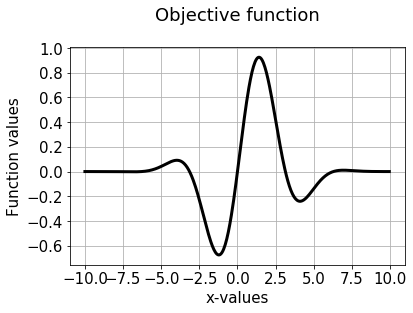

In [73]:
plot_nice(x,y,title="Objective function",xlabel='x-values',ylabel='Function values')

### Use `optimize.minimize_scalar()` method

In [74]:
result = optimize.minimize_scalar(scalar1)

In [75]:
result['success']

True

In [76]:
print("Minimum occurs at: ",result['x'])

Minimum occurs at:  -1.2214484245210282


In [77]:
print(result)

     fun: -0.6743051024666711
    nfev: 15
     nit: 10
 success: True
       x: -1.2214484245210282


### Bounded search (bound on the independent variable)

In [78]:
result = optimize.minimize_scalar(scalar1,bounds=(0,10),method='Bounded')

In [79]:
print("When bounded between 0 and 10, minimum occurs at: ",result['x'])

When bounded between 0 and 10, minimum occurs at:  4.101466164987216


### Other function-based constraints

In [80]:
def constraint1(x):
    return 0.5-np.log10(x**2+2)

In [81]:
def constraint2(x):
    return np.log10(x**2+2) - 1.5

In [82]:
def constraint3(x):
    return np.sin(x)+0.3*x**2-1

In [83]:
cons = ({'type':'ineq','fun':constraint1},
        {'type':'ineq','fun':constraint2},
       {'type':'eq','fun':constraint3})

In [84]:
result = optimize.minimize(scalar1,x0=0,method='SLSQP',constraints=cons,options={'maxiter':100})

In [85]:
print(result)

     fun: 0.7631695862891654
     jac: array([0.59193639])
 message: 'Iteration limit exceeded'
    nfev: 1254
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([0.8773752])


In [86]:
result = optimize.minimize(scalar1,x0=-20,method='SLSQP',constraints=cons,options={'maxiter':100})

In [87]:
print(result)

     fun: -0.28594944567686104
     jac: array([-0.46750661])
 message: 'Iteration limit exceeded'
    nfev: 1233
     nit: 101
    njev: 101
  status: 9
 success: False
       x: array([-2.37569791])


In [88]:
result = optimize.minimize(scalar1,x0=-20,method='SLSQP',constraints=cons,options={'maxiter':3})

In [89]:
print(result)

     fun: -0.4155114388552631
     jac: array([-0.46860977])
 message: 'Iteration limit exceeded'
    nfev: 12
     nit: 4
    njev: 4
  status: 9
 success: False
       x: array([-2.10190632])


### Multi-variate case: Sum of Gaussians

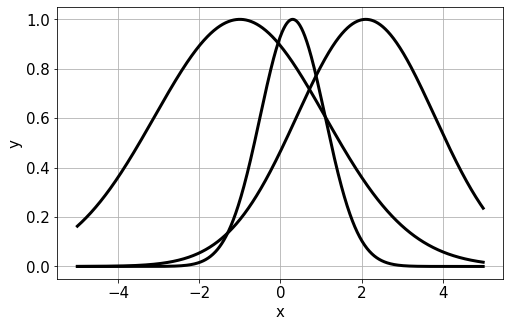

In [90]:
mu = [-1,0.3,2.1]
sigma = [2.1,0.8,1.7]
add=np.zeros(1000)
plt.figure(figsize=(8,5))
for m,s in zip(mu,sigma):
    x=np.arange(-5,5,0.01)
    y=np.exp(-(x-m)**2/(2*s**2))
    add+=y
    plot_nice(x,y,show=False)
    
plt.show()

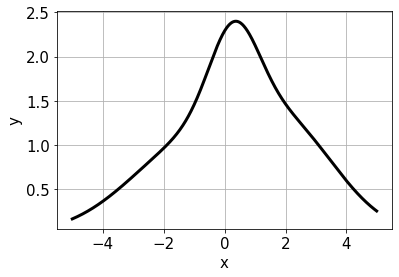

In [91]:
plot_nice(x=np.arange(-5,5,0.01),y=add)

In [92]:
def gaussian(m,s):
    x = np.arange(-5,5,0.01)
    return np.exp(-(x-m)**2/(2*s**2))

In [93]:
def gaussian_mixture(x):
    """
    Computes the resultant Gaussian mixture from an input vector and known mean, variance quantities
    """
    return -(np.exp(-(x[0]+1)**2/(2.1**2))+np.exp(-(x[1]-0.3)**2/(0.8**2))+np.exp(-(x[2]-2.1)**2/(1.7**2)))

In [94]:
gaussian_mixture(np.array([3,-2,2]))

-1.0233691172715331

In [95]:
x0=np.array([0]*3)
result = optimize.minimize(gaussian_mixture,x0=x0,method='SLSQP',options={'maxiter':100})

In [96]:
result

     fun: -2.999999618263914
     jac: array([-8.10027122e-05, -2.40206718e-04,  7.11023808e-04])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([-1.00017856,  0.29992313,  2.10102744])

### Bounds with multiple variables

In [97]:
x0=np.array([0]*3)
x1_bound = (-2,2)
x2_bound = (0,5)
x3_bound = (-3,0)
result = optimize.minimize(gaussian_mixture,x0=x0,method='SLSQP',options={'maxiter':100},
                           bounds=(x1_bound,x2_bound,x3_bound))

In [98]:
result

     fun: -2.217414055755018
     jac: array([-2.89082527e-06,  3.60012054e-04, -3.15965086e-01])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([-1.00000644e+00,  3.00115191e-01, -8.03574200e-17])